In [41]:
'''
import os
import shutil
#将训练的文件名收集到list，然后用filter分两类
trainFileName= os.listdir('train') 
catInTrain= filter(lambda x:x[:3] == 'cat', trainFileName)
dogInTrain= filter(lambda x:x[:3] == 'dog', trainFileName)

'''

"\nimport os\nimport shutil\n#将训练的文件名收集到list，然后用filter分两类\ntrainFileName= os.listdir('train') \ncatInTrain= filter(lambda x:x[:3] == 'cat', trainFileName)\ndogInTrain= filter(lambda x:x[:3] == 'dog', trainFileName)\n\n"

In [42]:
'''
def rm_mkdir(dirname): #first remove(if there exits the same name), then make a new empty file
    if os.path.exists(dirname):
        shutil.rmtree(dirname)
    os.mkdir(dirname)
'''

'\ndef rm_mkdir(dirname): #first remove(if there exits the same name), then make a new empty file\n    if os.path.exists(dirname):\n        shutil.rmtree(dirname)\n    os.mkdir(dirname)\n'

In [43]:
'''
rm_mkdir('Ftrain')  #创建软链接，把图片连到相应分类到文件夹
os.mkdir('Ftrain/cat')
os.mkdir('Ftrain/dog')
os.mkdir('Ftrain/dog')

rm_mkdir('testS')
os.symlink('../test/', 'testS/test')

for filename in catInTrain:
    os.symlink('../../train/'+filename, 'Ftrain/cat/'+filename)

for filename in dogInTrain:
    os.symlink('../../train/'+filename, 'Ftrain/dog/'+filename)
'''

"\nrm_mkdir('Ftrain')  #创建软链接，把图片连到相应分类到文件夹\nos.mkdir('Ftrain/cat')\nos.mkdir('Ftrain/dog')\nos.mkdir('Ftrain/dog')\n\nrm_mkdir('testS')\nos.symlink('../test/', 'testS/test')\n\nfor filename in catInTrain:\n    os.symlink('../../train/'+filename, 'Ftrain/cat/'+filename)\n\nfor filename in dogInTrain:\n    os.symlink('../../train/'+filename, 'Ftrain/dog/'+filename)\n"

### 以上是优达项目中处理文件夹的方式，放在这里便于查看，与下文无关。下面是用fastai v1.0的方式进行处理，（fastai网上课件使用fastai0.7，有很多不同），实现内容与lesson1, lesson2大致相同
---

In [44]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

Here we import the libraries we need. We'll learn about what each does during the course.

In [45]:
'''
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *
'''
# This file contains all the main external libs we'll use
from fastai import *
from fastai.vision import *


`PATH` is the path to your data - if you use the recommended setup approaches from the lesson, you won't need to change this. `sz` is the size that the images will be resized to in order to ensure that the training runs quickly. We'll be talking about this parameter a lot during the course. Leave it at `224` for now.

In [46]:
PATH = "./dogscats/"
TMP_PATH = "/tmp/tmp"
MODEL_PATH = "/tmp/model/"
sz=224

It's important that you have a working NVidia GPU set up. The programming framework used to behind the scenes to work with NVidia GPUs is called CUDA. Therefore, you need to ensure the following line returns `True` before you proceed. If you have problems with this, please check the FAQ and ask for help on [the forums](http://forums.fast.ai).

In [47]:
torch.cuda.is_available()

True

In addition, NVidia provides special accelerated functions for deep learning in a package called CuDNN. Although not strictly necessary, it will improve training performance significantly, and is included by default in all supported fastai configurations. Therefore, if the following does not return `True`, you may want to look into why.

In [48]:
torch.backends.cudnn.enabled

True

## First look at cat pictures

In [49]:
os.listdir(PATH)

['train', 'test1', 'valid', 'sample', 'models', 'tmp']

In [50]:
'''
#这是fastai kernel中的一段文件夹处理代码
fnames = np.array([f'train/{f}' for f in sorted(os.listdir(f'{PATH}train'))])
labels = np.array([(0 if 'cat' in fname else 1) for fname in fnames])
'''

"\n#这是fastai kernel中的一段文件夹处理代码\nfnames = np.array([f'train/{f}' for f in sorted(os.listdir(f'{PATH}train'))])\nlabels = np.array([(0 if 'cat' in fname else 1) for fname in fnames])\n"

In [51]:
#这是fastai kernel中的一段文件夹处理代码

#img = plt.imread(f'{PATH}{fnames[0]}')
#plt.imshow(img);

In [52]:
os.listdir(f'{PATH}valid')

['cats', 'dogs']

In [53]:
files = os.listdir(f'{PATH}valid/cats')[:5]
files

['cat.921.jpg', 'cat.4874.jpg', 'cat.1706.jpg', 'cat.7741.jpg', 'cat.4622.jpg']

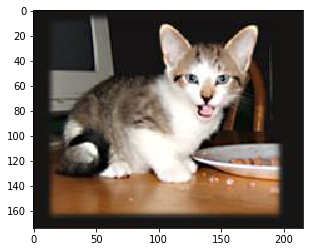

In [54]:
img = plt.imread(f'{PATH}valid/cats/{files[0]}')
plt.imshow(img);

This is what raw data looks like

In [55]:
img.shape

(174, 216, 3)

In [56]:
img[:4,:4]

array([[[22, 21, 19],
        [22, 21, 19],
        [22, 21, 19],
        [22, 21, 19]],

       [[22, 21, 19],
        [22, 21, 19],
        [22, 21, 19],
        [22, 21, 19]],

       [[22, 21, 19],
        [22, 21, 19],
        [22, 21, 19],
        [22, 21, 19]],

       [[22, 21, 19],
        [22, 21, 19],
        [22, 21, 19],
        [22, 21, 19]]], dtype=uint8)

### 另几种加载数据方法，fastai1.0使用

https://docs.fast.ai/vision.data.html#ImageDataBunch

In [57]:
'''
#这段代码是fastai0.7版本的
data = data_from_imagefolder(Path( 'data/dogscats'),

ds_tfms=get_transforms(), tfms=imagenet_norm, size= 224)

learn = ConvLearner(data, tvm.resnet34, metrics=accuracy)

learn.fit_one_cycle( 6)

learn.unfreeze()

learn.fit_one_cycle( 4, slice( 1e-5, 3e-4))

#下面这段是fastai1.0版本的
'''

"\n#这段代码是fastai0.7版本的\ndata = data_from_imagefolder(Path( 'data/dogscats'),\n\nds_tfms=get_transforms(), tfms=imagenet_norm, size= 224)\n\nlearn = ConvLearner(data, tvm.resnet34, metrics=accuracy)\n\nlearn.fit_one_cycle( 6)\n\nlearn.unfreeze()\n\nlearn.fit_one_cycle( 4, slice( 1e-5, 3e-4))\n\n#下面这段是fastai1.0版本的\n"

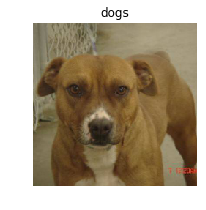

In [58]:
data = ImageDataBunch.from_folder(PATH, ds_tfms=get_transforms(), size=224).normalize(imagenet_stats)
img,label = data.valid_ds[-1]
img.show(title=label)

---
## first model: quick start

We're going to use a <b>pre-trained</b> model, that is, a model created by some one else to solve a different problem. Instead of building a model from scratch to solve a similar problem, we'll use a model trained on ImageNet (1.2 million images and 1000 classes) as a starting point. The model is a Convolutional Neural Network (CNN), a type of Neural Network that builds state-of-the-art models for computer vision. We'll be learning all about CNNs during this course.

We will be using the <b>resnet34</b> model. resnet34 is a version of the model that won the 2015 ImageNet competition. Here is more info on [resnet models](https://github.com/KaimingHe/deep-residual-networks). We'll be studying them in depth later, but for now we'll focus on using them effectively.

Here's how to train and evalulate a *dogs vs cats* model in 3 lines of code, and under 20 seconds:

#### tips: 显卡监控使用watch -n 2 nvidia-smi，2表示2秒刷新一次

In [25]:
learn = create_cnn(data, models.resnet34, metrics=accuracy)


In [19]:

learn.fit_one_cycle(1)
#learn.fit(1, 0.01)

epoch,train_loss,valid_loss,accuracy
1,0.061214,0.034432,0.989000


In [20]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


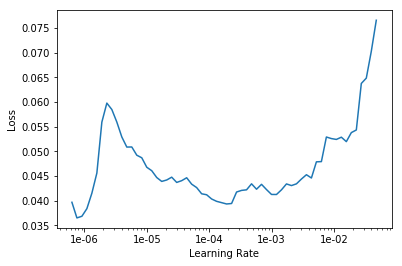

In [21]:
learn.recorder.plot() 

#### 再训练3个cycle看

In [22]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy
1,0.065596,0.035192,0.987000
2,0.039474,0.027037,0.990500
3,0.029942,0.022250,0.991500


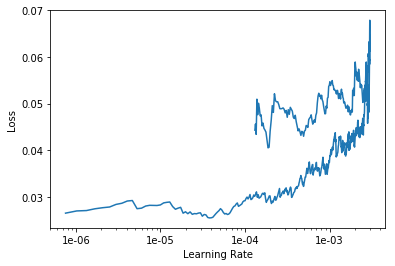

In [23]:
learn.recorder.plot()

In [24]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


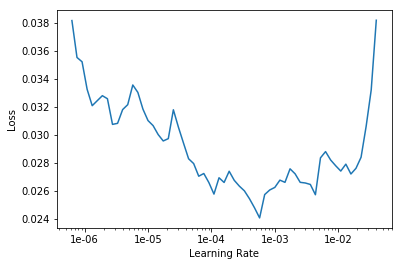

In [25]:
learn.recorder.plot()

#### 对比可看出learn.lr_find()后learn.recorder.plot()图像重叠的部分展开了。下面看一下混淆矩阵：

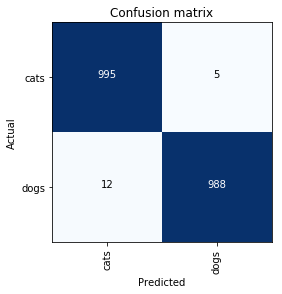

In [26]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

#### 下面看看最让模型头痛的样本（高loss）

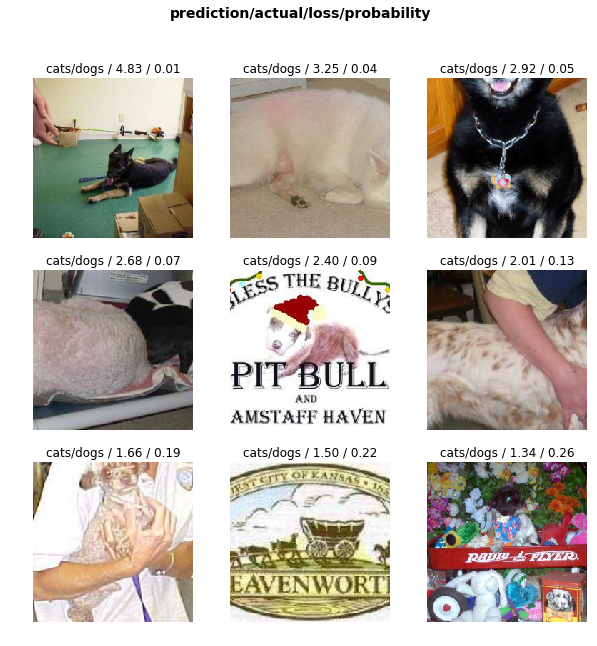

In [27]:
interp.plot_top_losses(9, figsize=(10,10))

In [28]:
learn.save('Resnet34_dogcat')

In [26]:
learn.load('Resnet34_dogcat')

Learner(data=ImageDataBunch;

Train: LabelList
y: CategoryList (18289 items)
[Category cats, Category cats, Category cats, Category cats, Category cats]...
Path: dogscats
x: ImageItemList (18289 items)
[Image (3, 325, 499), Image (3, 137, 180), Image (3, 216, 192), Image (3, 489, 499), Image (3, 289, 345)]...
Path: dogscats;

Valid: LabelList
y: CategoryList (2000 items)
[Category cats, Category cats, Category cats, Category cats, Category cats]...
Path: dogscats
x: ImageItemList (2000 items)
[Image (3, 174, 216), Image (3, 160, 239), Image (3, 299, 400), Image (3, 404, 349), Image (3, 375, 499)]...
Path: dogscats;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
 

## Analyzing results: looking at pictures

As well as looking at the overall metrics, it's also a good idea to look at examples of each of:
1. A few correct labels at random
2. A few incorrect labels at random
3. The most correct labels of each class (i.e. those with highest probability that are correct)
4. The most incorrect labels of each class (i.e. those with highest probability that are incorrect)
5. The most uncertain labels (i.e. those with probability closest to 0.5).

In [35]:
data

ImageDataBunch;

Train: LabelList
y: CategoryList (18289 items)
[Category cats, Category cats, Category cats, Category cats, Category cats]...
Path: dogscats
x: ImageItemList (18289 items)
[Image (3, 325, 499), Image (3, 137, 180), Image (3, 216, 192), Image (3, 489, 499), Image (3, 289, 345)]...
Path: dogscats;

Valid: LabelList
y: CategoryList (2000 items)
[Category cats, Category cats, Category cats, Category cats, Category cats]...
Path: dogscats
x: ImageItemList (2000 items)
[Image (3, 174, 216), Image (3, 160, 239), Image (3, 299, 400), Image (3, 404, 349), Image (3, 375, 499)]...
Path: dogscats;

Test: None

In [38]:
data.valid_ds

LabelList
y: CategoryList (2000 items)
[Category cats, Category cats, Category cats, Category cats, Category cats]...
Path: dogscats
x: ImageItemList (2000 items)
[Image (3, 174, 216), Image (3, 160, 239), Image (3, 299, 400), Image (3, 404, 349), Image (3, 375, 499)]...
Path: dogscats

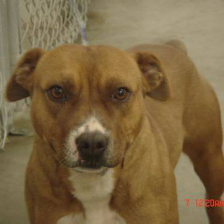

In [65]:
data.valid_ds[-1][0]

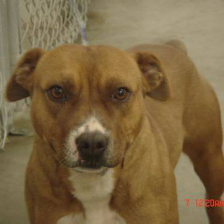

In [59]:
# This is the label for a val data
img


In [62]:
type(img)

fastai.vision.image.Image

In [30]:
# from here we know that 'cats' is label 0 and 'dogs' is label 1.
data.classes

['cats', 'dogs']

In [86]:

# this gives prediction for validation set. Predictions are in log scale
log_preds = learn.predict(data.train_ds[-1][0])
log_preds
#log_preds.shape

(Category dogs, tensor(1), tensor([8.6453e-06, 9.9999e-01]))

In [75]:
log_preds[2]

tensor([0.0000, 1.0000])

In [74]:
log_preds[2].shape


torch.Size([2])

In [76]:
log_preds[:10]

(Category dogs, tensor(1), tensor([0.0000, 1.0000]))

In [85]:
preds = np.argmax(log_preds, axis=1)  # from log probabilities to 0 or 1
probs = np.exp(log_preds[:,1])        # pr(dog)

AxisError: axis 1 is out of bounds for array of dimension 1

In [ ]:
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], min(len(preds), 4), replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y)==is_correct)

In [ ]:
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

In [ ]:
def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8)) if len(imgs)>0 else print('Not Found.')

Correctly classified


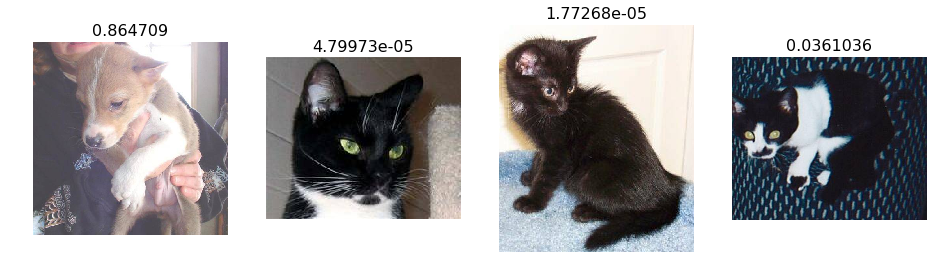

In [ ]:
# 1. A few correct labels at random
plot_val_with_title(rand_by_correct(True), "Correctly classified")